<a href="https://colab.research.google.com/github/Ymy9he/assignment4/blob/main/Copy_of_assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?
  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?
  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

In [16]:
! git clone https://github.com/Ymy9he/assignment4



fatal: destination path 'assignment4' already exists and is not an empty directory.


In [17]:
import numpy as  np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def pn(x):
    print(x,'\n')

df = pd.read_csv('/content/assignment4/data/cars_hw.csv') # Load car data
df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         976 non-null    int64 
 1   Make               976 non-null    object
 2   Make_Year          976 non-null    int64 
 3   Color              976 non-null    object
 4   Body_Type          976 non-null    object
 5   Mileage_Run        976 non-null    int64 
 6   No_of_Owners       976 non-null    object
 7   Seating_Capacity   976 non-null    int64 
 8   Fuel_Type          976 non-null    object
 9   Transmission       976 non-null    object
 10  Transmission_Type  976 non-null    object
 11  Price              976 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 91.6+ KB


<Axes: >

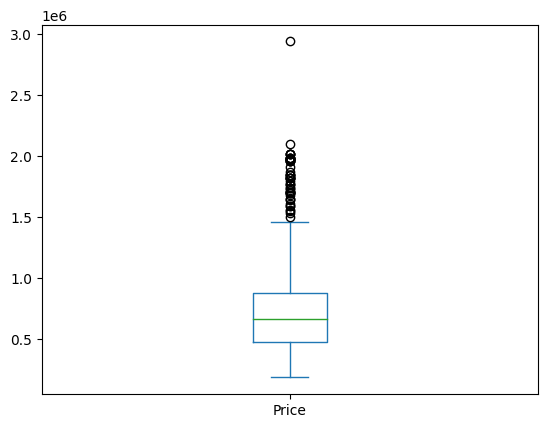

In [18]:
#Question 1
df.info()
df.describe()
df.isnull().sum()

df['Price'].plot.box() # check for outliers
#df = df.loc[df['Price']<2.5,:] #drop outliers above 2.5

count    9.760000e+02
mean     7.410195e+05
std      3.673234e+05
min      1.880000e+05
25%      4.757500e+05
50%      6.665000e+05
75%      8.830000e+05
max      2.941000e+06
Name: Price, dtype: float64


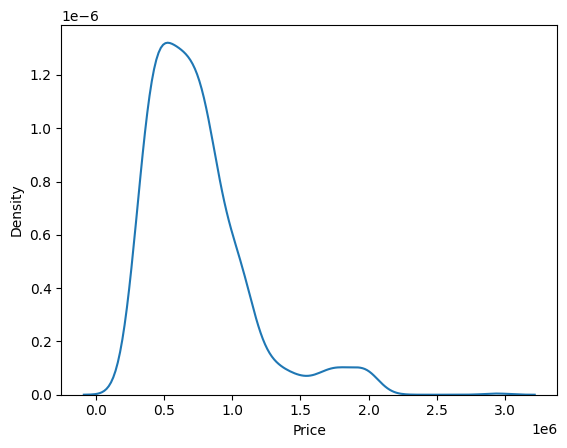

               count          mean           std        min        25%  \
Make                                                                     
Chevrolet        6.0  4.535000e+05  2.466064e+05   267000.0   288500.0   
Datsun           3.0  2.896667e+05  1.050397e+04   279000.0   284500.0   
Ford            52.0  7.211731e+05  1.409277e+05   290000.0   635000.0   
Honda           73.0  7.989726e+05  2.665091e+05   316000.0   581000.0   
Hyundai        305.0  6.918918e+05  2.791597e+05   248000.0   485000.0   
Jeep             4.0  1.499500e+06  1.525134e+05  1290000.0  1447500.0   
Kia              8.0  1.614750e+06  1.190567e+05  1369000.0  1579000.0   
MG Motors       35.0  1.869457e+06  1.216611e+05  1589000.0  1786500.0   
Mahindra        18.0  1.100167e+06  1.755493e+05   796000.0  1037000.0   
Maruti Suzuki  293.0  5.887850e+05  2.160199e+05   237000.0   411000.0   
Nissan           4.0  8.842500e+05  2.895599e+05   475000.0   782500.0   
Renault         68.0  6.625735e+05  2.

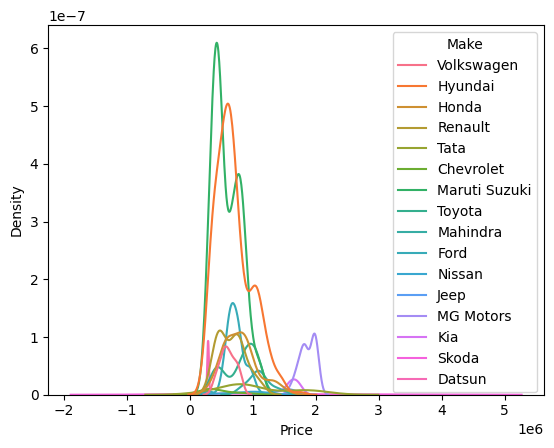

In [19]:
# Question 2
print(df["Price"].describe())

sns.kdeplot(data=df, x="Price")
plt.show()

print(df.groupby("Make")["Price"].describe())

sns.kdeplot(data=df, x="Price", hue="Make")
plt.show()


1. Skoda, Tata, MG Motors, and Kia cars are most expensive
2. In general prices appear to be on the higher end with a few below and with Datsun as an outlier being extremely small in comparison to the other prices

In [20]:
#Question 4
from sklearn.linear_model import LinearRegression # Import linear regression model

vars = ['Make_Year','Mileage_Run','Seating_Capacity'] # This is a list of variables to use
y = df['Price']

X = df.loc[:,vars] # Construct data matrix
pn(X.head()) # Peek at data


   Make_Year  Mileage_Run  Seating_Capacity
0       2017        44611                 5
1       2016        20305                 5
2       2019        29540                 5
3       2017        35680                 5
4       2017        25126                 5 



In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

X_train.head()

,Make_Year,Mileage_Run,Seating_Capacity
679,2018,18005,5
625,2013,47642,5
33,2021,13389,5
31,2013,10651,5
883,2017,36208,5


In [24]:

reg = LinearRegression().fit(X_train,y_train) # Fit the linear model
pn(reg.intercept_) # Intercept value
pn(reg.coef_) # Regression coefficients
pn(reg.score(X_test, y_test)) # R squared measure




#R2= 0.29407012364751284




-173612001.9911611 

[8.62141946e+04 3.16044954e+00 6.57304203e+04] 

0.29407012364751284 



In [25]:
vars = ['Color','Body_Type','Fuel_Type', 'Transmission_Type'] # This is a list of variables to use
y = df['Price']

ddf = pd.get_dummies(df.loc[:, vars],dtype='int', drop_first= True)
print(ddf)

     Color_black  Color_blue  Color_bronze  Color_brown  Color_golden  \
0              0           0             0            0             0   
1              0           0             0            0             0   
2              0           0             0            0             0   
3              0           0             1            0             0   
4              0           0             0            0             0   
..           ...         ...           ...          ...           ...   
971            0           0             0            0             0   
972            0           0             0            0             0   
973            0           0             0            0             0   
974            0           0             0            0             0   
975            0           0             0            0             0   

     Color_green  Color_grey  Color_maroon  Color_orange  Color_purple  ...  \
0              0           0             0  

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (ddf, y, test_size=0.2, random_state=42)

X_train.head()

,Color_black,Color_blue,Color_bronze,Color_brown,Color_golden,Color_green,Color_grey,Color_maroon,Color_orange,Color_purple,...,Color_silver,Color_white,Color_yellow,Body_Type_hatchback,Body_Type_muv,Body_Type_sedan,Body_Type_suv,Fuel_Type_petrol,Fuel_Type_petrol+cng,Transmission_Type_Manual
679,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
625,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,1
33,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
31,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,1
883,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1


In [27]:
reg = LinearRegression().fit(X_train,y_train) # Fit the linear model
pn(reg.intercept_) # Intercept value
pn(reg.coef_) # Regression coefficients
pn(reg.score(X_test, y_test)) # R squared measure

#r2 = 0.4762397083972597


648869.9778934243 

[ 307217.46067559  203602.49438007   40559.74554319  206583.55178853
  457994.97412409   18994.97412408  171051.58806378  349798.17524721
  223085.91412778  -55344.66604455  217437.29736103  155992.38657991
  242950.84298298   94834.20307449 -131809.48850377  -53793.34394387
  117062.38886001  436761.98762094 -132036.54300783    1486.81633481
  -69018.92050591] 

0.4762397083972597 



In [28]:
ym = pd.concat([X, ddf], axis = 1)
X_train, X_test, y_train, y_test = train_test_split (ddf, y, test_size=0.2, random_state=42)
X_train.head()

reg = LinearRegression().fit(X_train,y_train) # Fit the linear model
pn(reg.intercept_) # Intercept value
pn(reg.coef_) # Regression coefficients
pn(reg.score(X_test, y_test)) # R squared measure


#r2 0.4762397083972597

# My R2 was the same when combining it as it was for the categorical values

648869.9778934243 

[ 307217.46067559  203602.49438007   40559.74554319  206583.55178853
  457994.97412409   18994.97412408  171051.58806378  349798.17524721
  223085.91412778  -55344.66604455  217437.29736103  155992.38657991
  242950.84298298   94834.20307449 -131809.48850377  -53793.34394387
  117062.38886001  436761.98762094 -132036.54300783    1486.81633481
  -69018.92050591] 

0.4762397083972597 



-6.268611082950119e+23


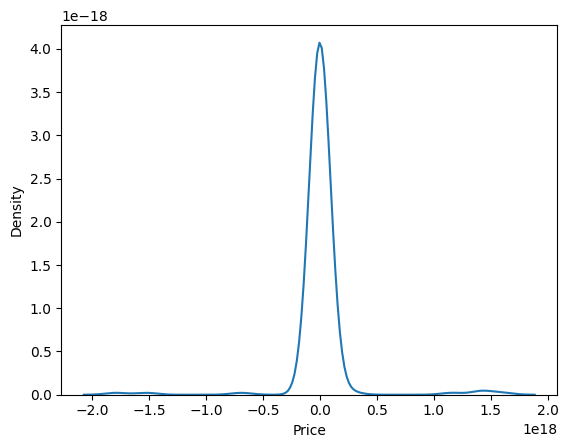

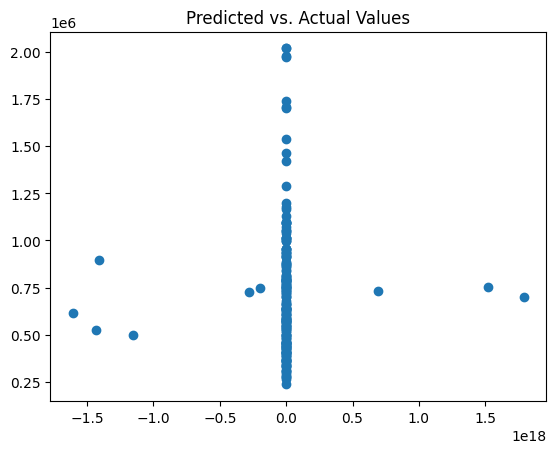

In [29]:
#question 5
## Polynomial features:
from sklearn.preprocessing import PolynomialFeatures

# Expand features
expander = PolynomialFeatures(degree=3,include_bias=False) # Create the expander
#
Z_train = expander.fit_transform(X_train) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_train_lm = pd.DataFrame(data=Z_train, columns = names) # Create a new, expanded dataframe
#
Z_test = expander.fit_transform(X_test) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_test_lm = pd.DataFrame(data=Z_test, columns = names) # Create a new, expanded dataframe

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(X_train_lm, y_train) # Fit the linear model
print(reg.score(X_test_lm, y_test)) # R squared measure

# Predicted values:
y_hat_lm = reg.predict(X_test_lm)
residuals_lm = y_test - y_hat_lm

## Residual plot:
sns.kdeplot(residuals_lm)
plt.show()

## True versus predicted plot:
plt.scatter(x=y_hat_lm,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()



Question5: I DONT KNOW HOW TO COMPARE THE R2 AND RMSE FOR THE ANSWER




for the neative it looks like -1 is when it gets really bad

Question 6: Yes, it is roughly bell curved around zero. However, I do not think its a good fit because it does not make a diagnol line. seems the data is all bunched up with a few outliers once the numbers increase or decrease from 0.

Weaknesses: is my graph does include outliers
strengths: A roughly bell-shaped distribution of residuals around zero indicates that the model's errors are centered and have a normal-like distribution.


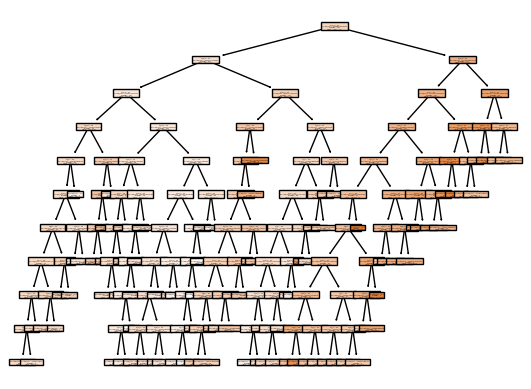

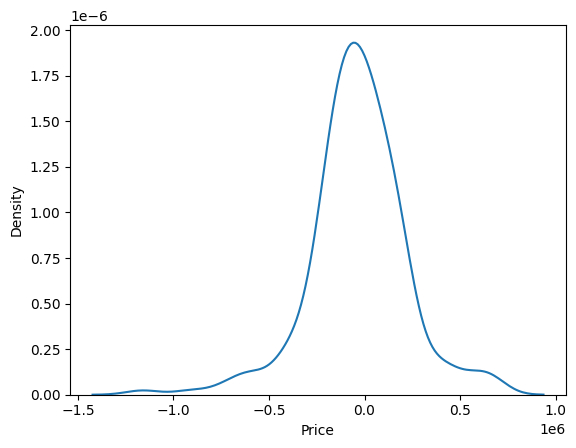

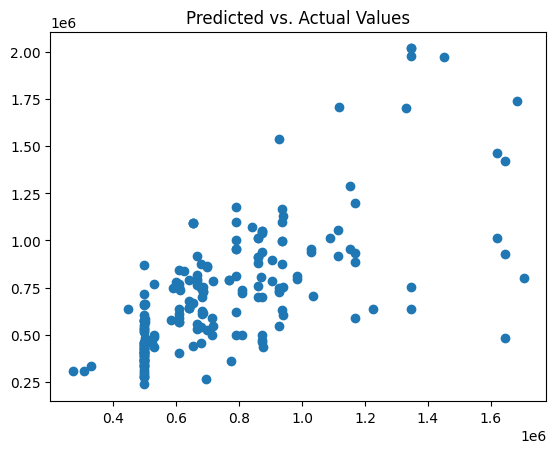

In [30]:
#Question 7 & 8
from sklearn import tree

model = tree.DecisionTreeRegressor(max_depth=10) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True)
plt.show()

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)
residuals_cart = y_test - y_hat_cart

## Residual plot:
sns.kdeplot(residuals_cart)
plt.show()

## True versus predicted plot:
plt.scatter(x=y_hat_cart,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()




Q9 I think the last graph was the best because its more understandable and provides a good depiction

## **Q2.** The is a question about regression using decision trees and linear models. The data include wages at data science-y jobs, including

  - `Rating`: Company worker happiness score
  - `Size`: Number of employees
  - `Sector`: Part of the economy
  - `avg_salary`: Average wage
  - `job_state`: Location of work

  1. Load the `wages_hw.csv` file. Split the sample into an ~80% training set and a ~20% test set. Do any necessary cleaning, including outliers and missings.
  2. Use a linear model to regress `avg_salary` on `Sector`. Which sectors have the highest predicted wages? What is the $R^2$ and `RMSE` on the test set?
  3. Make a scatterplot of `avg_salary` and `Rating`. Is there an obvious visual relationship between the two variables? Regress `avg_salary` on `Rating` as a numeric variable: Do higher ratings predict higher or lower wages? Convert `Rating` to a one-hot encoded variable, with a category for each rating. Run a regression of `avg_salary` on the categorical version. How do your results change? Explain. Which version has a higher $R^2$ and lower `RMSE`?
  4. Now interact `Sector` with the categorical version of `Rating`, so your regressors are a (Sector, Rating) pair; this is a programming puzzle you'll have to think about, but using the `.PolynomialFeatures()` function on the one-hot encoded categorical variables is one option, and another is pre-processing a new variable that interacts `Sector` and `Rating` and then one-hot encoding the result. Regress `avg_salary` on the (Sector, Rating) pairs. How does the $R^2$ and `RMSE` on the test set compare to part 2? Interpret the coefficients; which sector-rating pairs have the highest wages?
  5. Run a linear regression of `avg_salary` on all the variables. What is the $R^2$ on the test set? How does it compare to your simpler models in 2--4?
  6. Build a decision tree by regressing `avg_salary` on `Sector`, `Rating`, and the (Sector, Rating) pairs. What are the $R^2$ and `RMSE` of your models on the test set? How do your answers compare to parts 2, 3, and 4?
  7. Build a decision tree by regressing `avg_salary` on all the other variables. What is the $R^2$ and `RMSE` on the test set?
  8. Build a linear regression or decision tree using the available variables based on your own judgment. What degrees of freedom are you giving the model to predict variation in wages across company and location attributes? What is the $R^2$ and `RMSE` of your model? How does it compare to the previous ones in the question? Why does yours perform better or worse on the test set?

In [ ]:
import numpy as  np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def pn(x):
    print(x,'\n')

df = pd.read_csv('/content/assignment4/data/wages_hw.csv') # Load car data
df.head()

,Unnamed: 0,Rating,Size,Sector,avg_salary,job_state
0,1,3.8,501 to 1000 employees,Aerospace & Defense,72.0,NM
1,2,3.4,10000+ employees,Health Care,87.5,MD
2,3,4.8,501 to 1000 employees,Business Services,85.0,FL
3,4,3.8,1001 to 5000 employees,"Oil, Gas, Energy & Utilities",76.5,WA
4,5,2.9,51 to 200 employees,Business Services,114.5,NY


In [ ]:
#Question 1
# Splitting the Sample into Train/Test Sets:
from sklearn.model_selection import train_test_split

## Preprocess Data:
y = df['avg_salary']
X = df.drop(['avg_salary'], axis=1)

## Split the Sample into Training and Testing Sets:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 103 to 698
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9 non-null      int64  
 1   Rating      9 non-null      float64
 2   Size        9 non-null      object 
 3   Sector      9 non-null      object 
 4   avg_salary  9 non-null      float64
 5   job_state   9 non-null      object 
dtypes: float64(2), int64(1), object(3)
memory usage: 504.0+ bytes


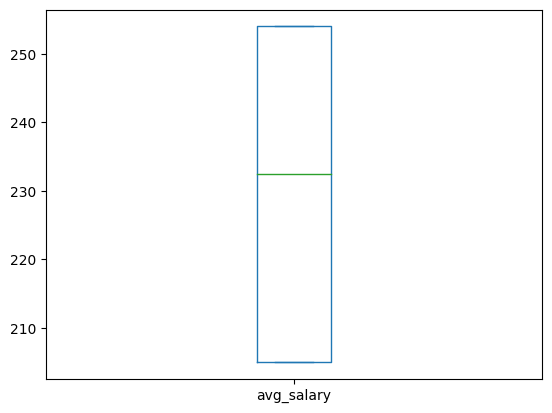

In [ ]:
df.info()
df.describe()
df.isnull().sum()

df['avg_salary'].plot.box() # check for outliers
df = df.loc[df['avg_salary']<200,:] #drop outliers above 200




In [ ]:
#Question  2
x = df['avg_salary']
y = df['Sector']

coef = slr(x,y)

y_hat = coef['b0']+coef['b1']*x
plt.scatter(x,y,label='Data')
plt.plot(x,y_hat,label='Regression Line',color='black')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='upper right')
plt.title('Linear Regression: Looks OK')

plt.show()

NameError: ignored

NameError: ignored

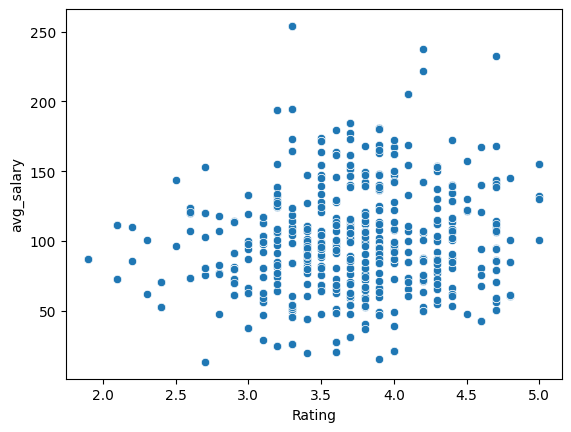

In [ ]:
#Question 3
sns.scatterplot(data=df,y='avg_salary',x='Rating') # Yes there appears to be a positive correlation; and becuase of
#how close the points are its clear one variable predicts the other

x = df['avg_salary']
y = df['Rating']

coef = slr(x,y) # Single Linear Regression
print('Intercept: ',coef['b0'], '\n', ' Slope: ', coef['b1'])

y_hat = coef['b0']+coef['b1']*x # Compute predictions

# Scatter plot of fit:
plt.scatter(x,y,label='Data')
plt.plot(x,y_hat,label='Regression Line',color='black')
plt.xlabel("Mileage, ihs")
plt.ylabel("Price, ihs")
plt.legend(loc='upper right')
plt.title('Linear Regression')

plt.show()


**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high
    - Husband's education (categorical) 1=low, 2, 3, 4=high
    - Number of children ever born (numerical)
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?
  2. Split the sample into ~80% training data and ~20% testing data.
  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.
  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?
  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.
  7. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

**Q4.** This is a question where we use regression and regression trees. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running these regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

In [38]:
! git clone https://github.com/Ymy9he/assignment4

from sklearn.linear_model import LinearRegression # Import linear regression model

df = pd.read_csv('/content/assignment4/data/pretrial_data.csv')


fatal: destination path 'assignment4' already exists and is not an empty directory.


In [39]:
print(df.head())


   Unnamed: 0 case_type   age sex race  is_poor  bond  bond_type  prior_F  \
0           0         F  31.0   M    W      NaN   NaN          7      0.0   
1           1         F  60.0   M    B      NaN   NaN          7     13.0   
2           2         M  27.0   M    W      NaN   NaN          7      0.0   
3           3         M  27.0   M    B      0.0   NaN          7      0.0   
4           4         F  28.0   F    W      0.0   NaN          7      0.0   

   prior_M  gini  released  sentence_type   sentence  bond_NA  held_wo_bail  \
0      0.0  0.44       NaN            NaN        NaN     True         False   
1     21.0  0.44       0.0            0.0  60.000000     True         False   
2      0.0  0.44       0.0            1.0  12.000000     True         False   
3      9.0  0.44       0.0            1.0   0.985626     True         False   
4      0.0  0.44       1.0            4.0   0.000000     True         False   

   sentence_NA  
0         True  
1        False  
2        Fa

In [40]:

df['held'] = df['held_wo_bail'].astype(int)
df['Black'] = (df['race']=='B').astype(int)
df['sex'] = df['sex'].replace(['M','F'],['Male','Female'])

rdf = df.loc[:,['held','Black','sex','case_type','is_poor','prior_F']]
rdf = rdf.dropna()
rdf['held'].value_counts()

sex_dummies = pd.get_dummies(rdf['sex'],dtype='int',drop_first=True)
case_type_dummies = pd.get_dummies(rdf['case_type'],dtype='int',drop_first=True)

## Black and Sex
y = rdf['held']
X = pd.concat([rdf['Black'],sex_dummies],axis=1)
reg = LinearRegression().fit(X,y)
print(reg.feature_names_in_)
print(reg.coef_)

## Black and Sex and is_poor
y = rdf['held']
X = pd.concat([rdf.loc[:,['Black','is_poor']],sex_dummies],axis=1)
reg = LinearRegression().fit(X,y)
print(reg.feature_names_in_)
print(reg.coef_)

## Black and Sex and is_poor and prior_F
y = rdf['held']
X = pd.concat([rdf.loc[:,['Black','is_poor','prior_F']],sex_dummies],axis=1)
reg = LinearRegression().fit(X,y)
print(reg.feature_names_in_)
print(reg.coef_)

## Black and Sex and is_poor and prior_F and case_type
y = rdf['held']
X = pd.concat([rdf.loc[:,['Black','is_poor','prior_F']],sex_dummies,case_type_dummies],axis=1)
reg = LinearRegression().fit(X,y)
print(reg.feature_names_in_)
print(reg.coef_)

['Black' 'Male']
[0.06324377 0.10137723]
['Black' 'is_poor' 'Male']
[0.03638554 0.18533696 0.11484456]
['Black' 'is_poor' 'prior_F' 'Male']
[0.02664317 0.16760571 0.02600419 0.09779918]
['Black' 'is_poor' 'prior_F' 'Male' 'I' 'M' 'S']
[ 0.01954164  0.0736801   0.01616432  0.08449289 -0.50838353 -0.42118568
 -0.13985653]


**Q5.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?